# Processing Data And Gaining Some Insights

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("data/cleaned_parquet/final/PubMedAbstracts_final.parquet")
df.head()

,uid,title,journal,pubdate,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,date,parsed_date
0,10150804,Evaluation of survival in medically treated pa...,"Journal of insurance medicine (New York, N.Y.)",None-01-01,General: Articles published in medical journal...,Iacovino J R,"New York Life Insurance Company, New York, USA.",Adolescent; Adult; Age Distribution; Chelation...,,N/A,1994-01-01,1994-01-01
1,9061841,Cohort versus cross-sectional design in large ...,Statistics in medicine,1994-Jan-15,General: In planning large longitudinal field ...,Feldman H A; McKinlay S M,"New England Research Institute, Inc., Watertow...",Analysis of Variance; Cluster Analysis; Cohort...,,N/A,1994-01-01,1994-01-15
2,9061840,Network analytic methods for epidemiological r...,Statistics in medicine,1994-Jan-15,General: The authors measure the efficacy of t...,Altmann M; Wee B C; Willard K; Peterson D; Gat...,"Division of Health Computer Sciences, Universi...",Analysis of Variance; Communicable Disease Con...,,N/A,1994-01-01,1994-01-15
3,9061838,"Estimating age, period and cohort effects usin...",Statistics in medicine,1994-Jan-15,General: To understand cancer aetiology better...,Holford T R; Zhang Z; McKay L A,"Department of Epidemiology and Public Health, ...","Age Factors; Cell Transformation, Neoplastic; ...",,N/A,1994-01-01,1994-01-15
4,16353609,A perspective on the hormonal abnormalities of...,Obesity research,1994-Jan-01,General: Studies in our laboratory and elsewhe...,Zumoff B; Strain G W,"Division of Endocrinology and Metabolism, Depa...",Adolescent; Adult; Estradiol; Estrone; Female;...,,N/A,1994-01-01,1994-01-01


In [3]:
# na per column 
df.isna().sum()

uid               0
title             0
journal           0
pubdate           0
abstract         14
authors           0
affiliations      0
mesh_terms        0
keywords          0
coi_statement     0
date              0
parsed_date       0
dtype: int64

### **Step 1**: Filtering rows + removal of missing records (missing abstracts are, after checking manually, missing from articles itself, they are **NOT** due to mistakes in the processing or data gathering)

In [4]:
missing_abstracts = df[df["abstract"].isna()]
print("Rows where 'abstract' is missing:")
missing_abstracts

Rows where 'abstract' is missing:


,uid,title,journal,pubdate,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,date,parsed_date
13973,7479089,Transverse temperature-gradient single-strand ...,Nucleic acids research,1995-Oct-25,None,Grace M B; Bambeck G S; Buzard G S; Weintraub B D,"Diabetes and Digestive and Kidney Diseases, Na...","Electrophoresis, Polyacrylamide Gel; Exons; Hu...",,N/A,1995-10-01,1995-10-25
396952,19951381,Probing the limits of regional tissue oxygenat...,"Critical care (London, England)",2009-01-01,None,Pinsky Michael R; Payen Didier,"Critical Care Medicine, Bioengineering, Cardio...",Hemoglobins; Humans; Microcirculation; Oxygen ...,,N/A,2009-01-01,2009-01-01
714156,28549132,Selective impairment of goal-directed decision...,Brain : a journal of neurology,2017-Jun-01,None,Reber Justin; Feinstein Justin S; O'Doherty Jo...,Department of Psychological and Brain Sciences...,Aged; Brain Diseases; Choice Behavior; Cogniti...,decision-making; devaluation; instrumental; re...,N/A,2017-06-01,2017-06-01
748429,29240851,Off Target But Hitting the Mark.,Journal of hospital medicine,2018-Apr-01,None,Kara Areeba; Mookherjee Somnath; Gavin Warren;...,"Inpatient Medicine, Indiana University Health ...",Abdominal Pain; Adult; Cholecystectomy; Doxycy...,,N/A,2018-04-01,2018-04-01
771404,30496332,Towards Scalable Hospital-Based Palliative Car...,Journal of hospital medicine,2018-Dec-01,None,Courtright Katherine R; O'Connor Nina R,"Division of Pulmonary, Allergy, and Critical C...",Hospitalists; Hospitals; Humans; Palliative Care,,N/A,2018-12-01,2018-12-01
771443,30475933,The vaginal wellness consultation for treatmen...,Seminars in cutaneous medicine and surgery,2018-Dec-01,None,Miller Misha D,Mohs Micrographic Surgery and Cutaneous Oncolo...,Atrophy; Catheter Ablation; Female; Humans; La...,,N/A,2018-12-01,2018-12-01
775681,30667412,Nudging Providers to Improve Sleep for Hospita...,Journal of hospital medicine,2019-Jan-01,None,Auriemma Catherine L; Greysen S Ryan,Division of Pulmonary and Critical Care Medici...,Choice Behavior; Decision Making; Goals; Human...,,N/A,2019-01-01,2019-01-01
775682,30667405,The Journal of Hospital Medicine in 2019 and B...,Journal of hospital medicine,2019-Jan-01,None,Shah Samir S,Divisions of Hospital Medicine and Infectious ...,Biomedical Research; Hospital Medicine; Humans...,,N/A,2019-01-01,2019-01-01
776638,30534643,Clinical Operations Research: A New Frontier f...,Journal of hospital medicine,2019-Jan-08,None,Kohn Rachel; Greysen S Ryan,"Department of Medicine, Perelman School of Med...",General Practice; Humans,,N/A,2019-01-01,2019-01-08
792798,31010740,RETRACTED: Comprehensive Analysis of the Expre...,Molecular therapy : the journal of the America...,2019-Jun-05,None,Sun Cheng-Cao; Li Shu-Jun; Hu Wei; Zhang Jian;...,Department of Occupational and Environmental H...,"Biomarkers, Tumor; Breast Neoplasms; Computati...",E2Fs; Kaplan-Meier Plotter; biomarkers; breast...,N/A,2019-06-01,2019-06-05


In [5]:
x = (df.shape)

# 1) Drop rows with missing abstract (14)
df = df.dropna(subset=["abstract"])

print("Removed missing abstract rows:")
print(x[0]-df.shape[0])

# 2) Drop rows with year == 2025
# first ensure parsed_date is datetime
df["parsed_date"] = pd.to_datetime(df["parsed_date"], errors="coerce")

#df = df[df["parsed_date"].dt.year != 2025]
# Exclude years 1994 and 2025 ; 1994 has low amount of articles
df = df[(df["parsed_date"].dt.year != 1994) & (df["parsed_date"].dt.year != 2025)]

print("Removed total rows:")
print(x[0] - df.shape[0])

Removed missing abstract rows:
14
Removed total rows:
1890


In [6]:
# selecting only columns that we will be working with
df = df[["uid", "title", "journal", "abstract", "authors", "affiliations", "mesh_terms", "keywords", "coi_statement", "parsed_date"]].copy()

In [7]:
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date
930,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01
931,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01
932,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01
933,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01
934,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01


In [8]:
from collections import Counter

# Split keywords and clean
mesh = [
    kw.strip().lower() 
    for row in df["mesh_terms"] 
    for kw in row.split(";") 
    if kw.strip()  
]

# Count frequencies
mesh_freq = Counter(mesh)
print(mesh_freq.most_common(10))



[('humans', 1057871), ('female', 472540), ('male', 432617), ('middle aged', 289180), ('adult', 283915), ('aged', 227184), ('animals', 181045), ('adolescent', 114072), ('risk factors', 102561), ('child', 96124)]


In [19]:
len(mesh_freq)

27087

In [9]:
skip = [
    'humans', 'female', 'male', 'middle aged', 'adult', 'aged', 'animals', 
    'adolescent', 'risk factors', 'child', 'treatment outcome', 
    'retrospective studies', 'aged, 80 and over', 'united states', 'mice', 
    'young adult', 'severity of illness index', 'child, preschool', 
    'prospective studies', 'follow-up studies', 'infant', 'prognosis', 
    'time factors', 'disease models, animal', 'cohort studies', 
    'disease progression', 'cross-sectional studies', 
    'surveys and questionnaires', 'infant, newborn', 'risk assessment', 
    'magnetic resonance imaging', 'prevalence', 'pregnancy', 'biomarkers', 
    'genetic predisposition to disease', 'mutation', 'incidence', 
    'signal transduction', 'brain', 'case-control studies', 'quality of life', 
    'age factors', 'diagnosis, differential', 'reproducibility of results', 
    'sensitivity and specificity', 'tomography, x-ray computed', 
    'predictive value of tests', 'survival rate', 'phenotype', 
    'comorbidity', 'antineoplastic agents', 'postoperative complications', 
    'cells, cultured', 'anti-bacterial agents', 'neoplasm staging', 
    'genotype', 'logistic models', 'longitudinal studies', 
    'survival analysis', 'clinical trials as topic', 
    'cell line', 'antineoplastic combined chemotherapy protocols', 
    'polymorphism, single nucleotide', 'sex factors', 'disease-free survival', 
    'randomized controlled trials as topic', 'black or african american', 
    'multivariate analysis', 'mice, inbred c57bl', 'combined modality therapy', 
    'aging', 'double-blind method', 'molecular sequence data', 'algorithms', 
    'rats', 'models, biological', 'recurrence', 'dose-response relationship, drug', 
    'neoplasm recurrence, local', 'hospitalization', 
    'proportional hazards models', 'cytokines', 'gene expression regulation'
]

In [10]:
# Exclude terms in the skip list
filtered_mesh_freq = Counter({term: count for term, count in mesh_freq.items() if term not in skip})
print(filtered_mesh_freq.most_common(10))

[('chronic disease', 33180), ('hiv infections', 33048), ('cardiovascular diseases', 29859), ('alzheimer disease', 28307), ('neoplasms', 27441), ('covid-19', 24319), ('breast neoplasms', 20588), ('acute disease', 19974), ('inflammation', 18143), ('obesity', 17039)]


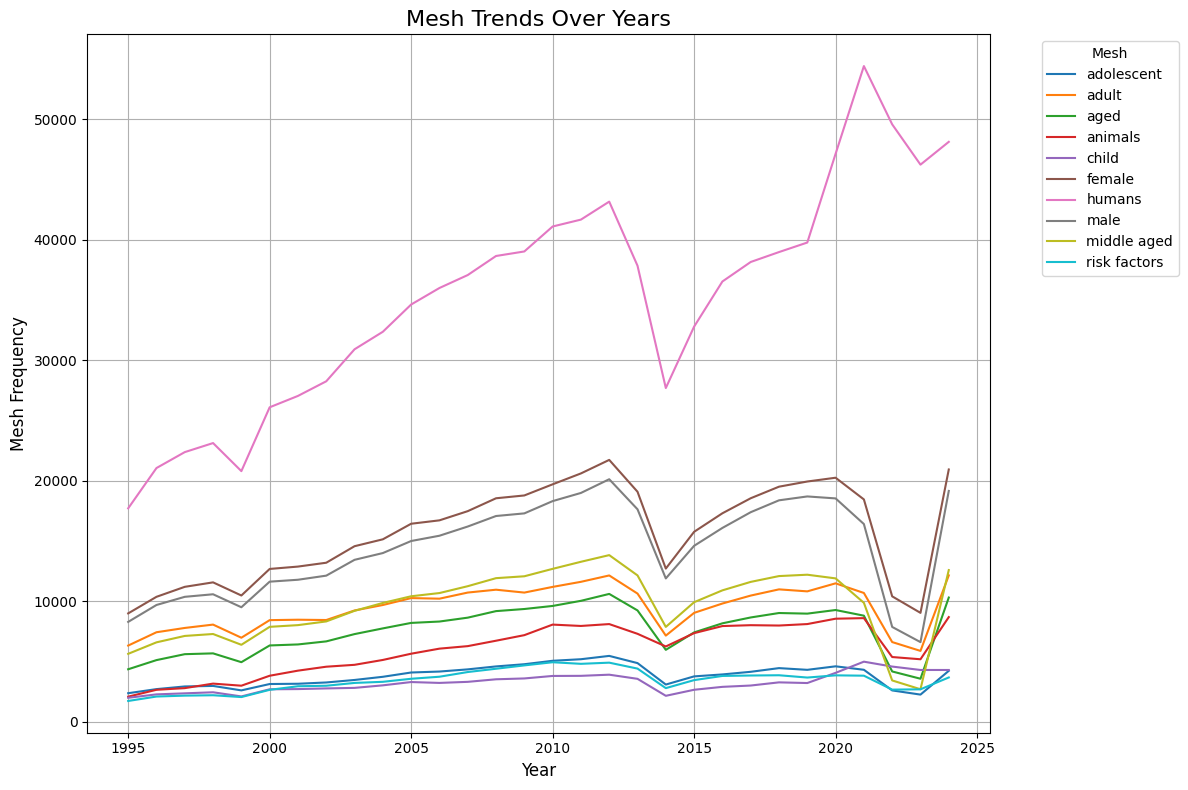

In [11]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year from 'parsed_date'
df['year'] = df['parsed_date'].dt.year

# Expand MESH terms into individual rows, clean them, and convert to lowercase
mesh_rows = (
    df['mesh_terms']
    .dropna()  # Remove rows with missing MESH terms
    .str.split(';')  # Split terms by semicolon
    .explode()  # Expand each term into its own row
    .str.strip()  # Remove extra whitespace
    .str.lower()  # Convert to lowercase
)

# Combine expanded MESH terms with their corresponding year
mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year': df.loc[mesh_rows.index, 'year']
})

# Count keyword occurrences per year
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Get the top N keywords for analysis (e.g., top 10)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)

# Filter trends for only the top keywords
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]

# Pivot data for plotting
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

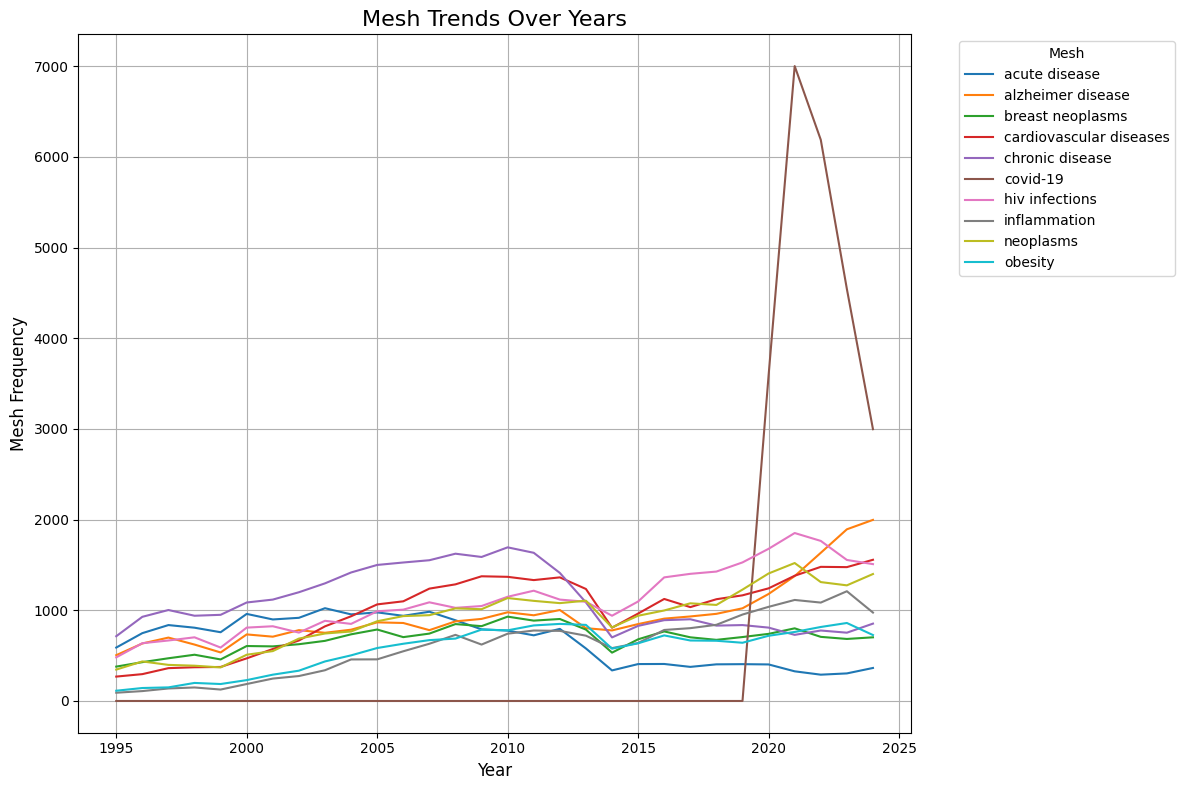

In [12]:
# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year from 'parsed_date'
df['year'] = df['parsed_date'].dt.year

# Expand MESH terms into individual rows, clean them, and convert to lowercase
mesh_rows = (
    df['mesh_terms']
    .dropna()  # Remove rows with missing MESH terms
    .str.split(';')  # Split terms by semicolon
    .explode()  # Expand each term into its own row
    .str.strip()  # Remove extra whitespace
    .str.lower()  # Convert to lowercase
)

# Combine expanded MESH terms with their corresponding year
mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year': df.loc[mesh_rows.index, 'year']
})
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip)]

# Count keyword occurrences per year
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Get the top N keywords for analysis (e.g., top 10)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)

# Filter trends for only the top keywords
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]

# Pivot data for plotting
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
skip2 = ["acute disease", "chronic disease"]

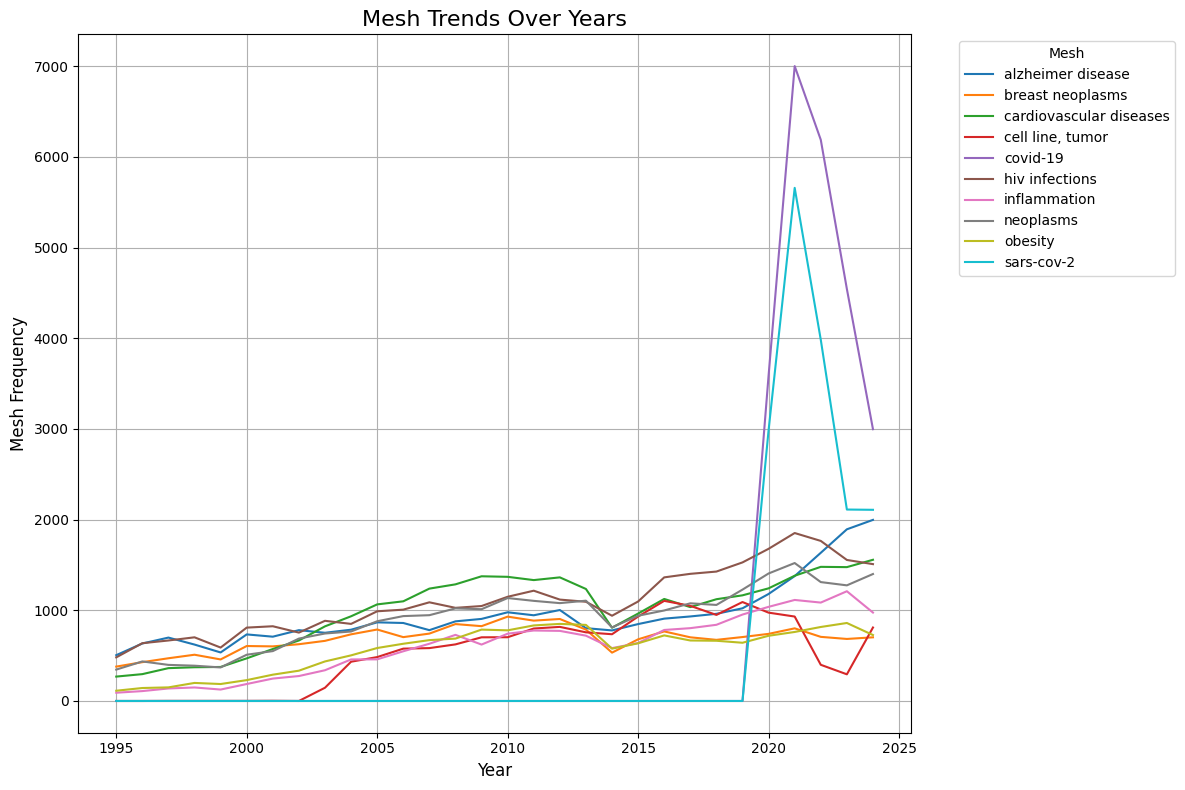

In [14]:
# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year from 'parsed_date'
df['year'] = df['parsed_date'].dt.year

# Expand MESH terms into individual rows, clean them, and convert to lowercase
mesh_rows = (
    df['mesh_terms']
    .dropna()  # Remove rows with missing MESH terms
    .str.split(';')  # Split terms by semicolon
    .explode()  # Expand each term into its own row
    .str.strip()  # Remove extra whitespace
    .str.lower()  # Convert to lowercase
)

# Combine expanded MESH terms with their corresponding year
mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year': df.loc[mesh_rows.index, 'year']
})
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip)]
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip2)]

# Count keyword occurrences per year
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Get the top N keywords for analysis (e.g., top 10)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)

# Filter trends for only the top keywords
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]

# Pivot data for plotting
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
skip3 = ["covid-19", "sars-cov-2"]

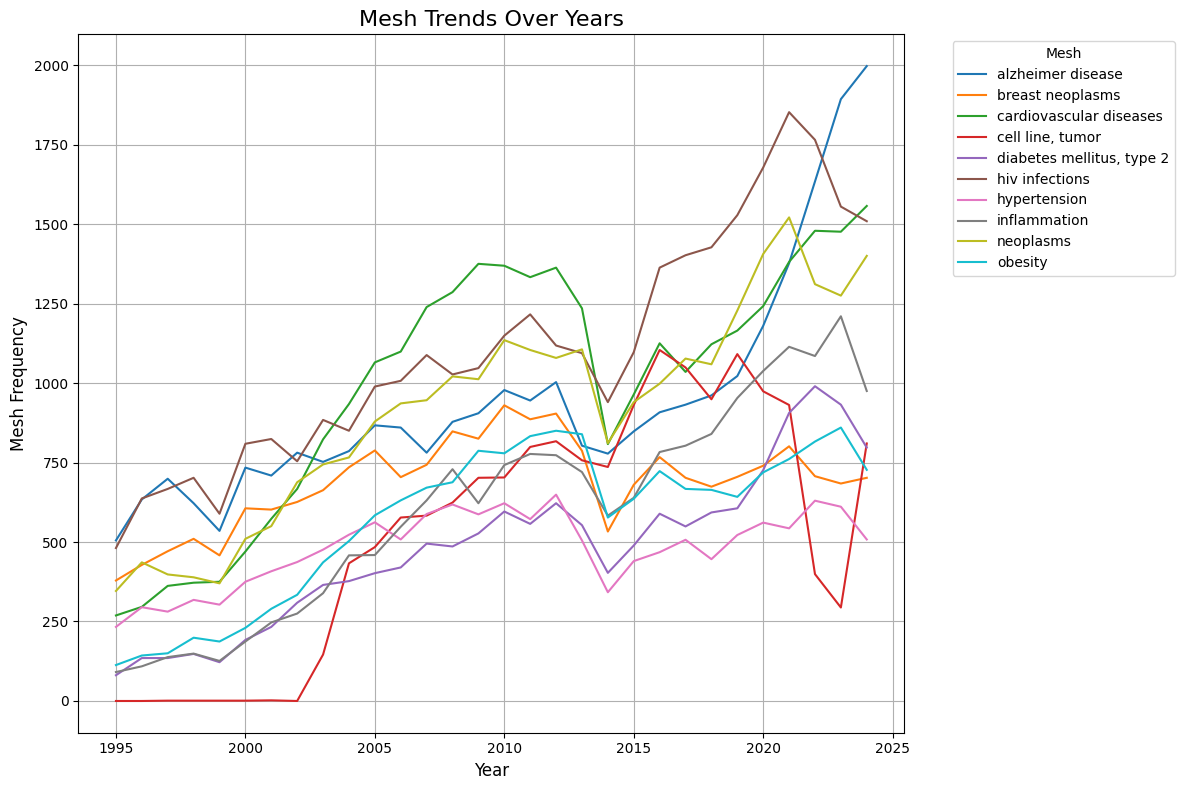

In [ ]:
# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year from 'parsed_date'
df['year'] = df['parsed_date'].dt.year

# Expand MESH terms into individual rows, clean them, and convert to lowercase
mesh_rows = (
    df['mesh_terms']
    .dropna()  # Remove rows with missing MESH terms
    .str.split(';')  # Split terms by semicolon
    .explode()  # Expand each term into its own row
    .str.strip()  # Remove extra whitespace
    .str.lower()  # Convert to lowercase
)

# Combine expanded MESH terms with their corresponding year
mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year': df.loc[mesh_rows.index, 'year']
})

mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip)]
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip2)]
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip3)]


# Count keyword occurrences per year
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Get the top N keywords for analysis (e.g., top 10)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)

# Filter trends for only the top keywords
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]

# Pivot data for plotting
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

# Plot trends
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

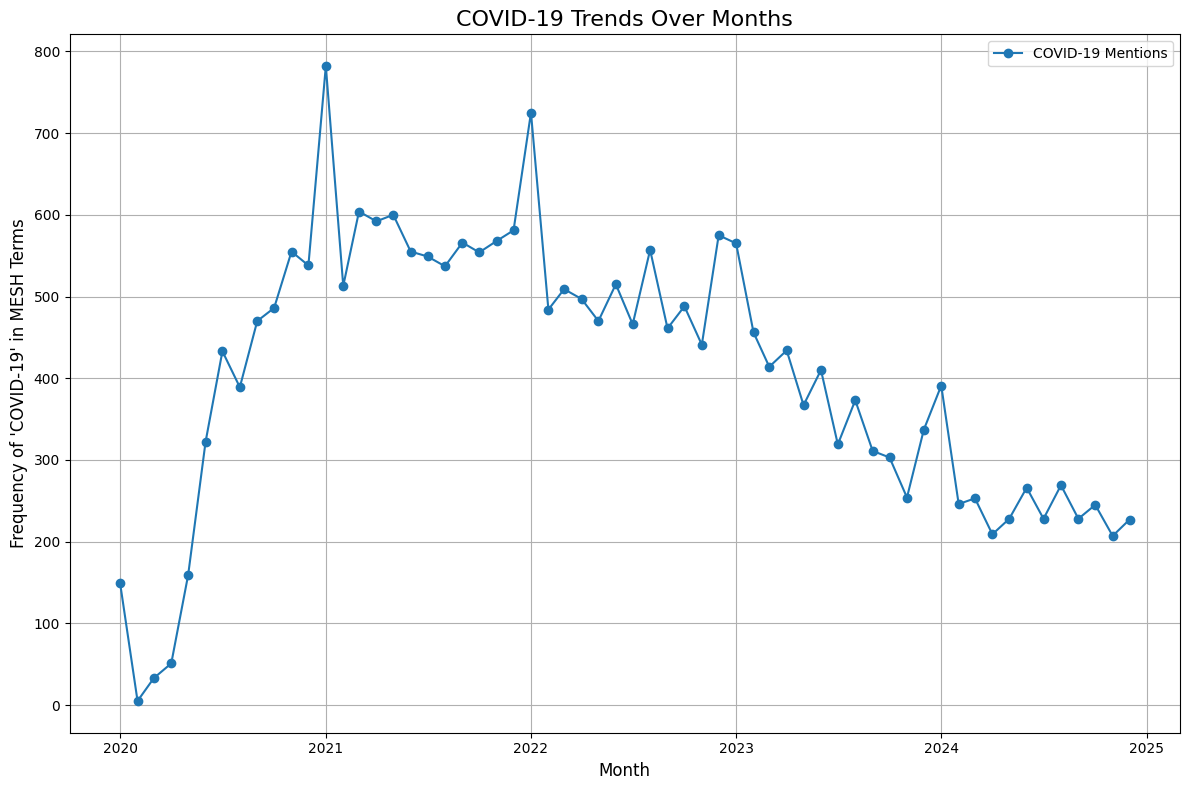

In [17]:
# Ensure 'parsed_date' is a datetime type
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

# Extract year and month from 'parsed_date'
df['year_month'] = df['parsed_date'].dt.to_period('M')

# Expand MESH terms into individual rows, clean them, and convert to lowercase
mesh_rows = (
    df['mesh_terms']
    .dropna()  # Remove rows with missing MESH terms
    .str.split(';')  # Split terms by semicolon
    .explode()  # Expand each term into its own row
    .str.strip()  # Remove extra whitespace
    .str.lower()  # Convert to lowercase
)

# Combine expanded MESH terms with their corresponding year and month
mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year_month': df.loc[mesh_rows.index, 'year_month']
})

# Filter for "covid-19" only
covid_data = mesh_data[mesh_data['mesh_terms'] == 'covid-19']

# Count occurrences of "covid-19" per month
covid_trends = (
    covid_data
    .groupby(['year_month'])
    .size()
    .reset_index(name='count')  # Add count column
)

# Convert 'year_month' back to datetime for plotting
covid_trends['year_month'] = covid_trends['year_month'].dt.to_timestamp()

# Plot trends
plt.figure(figsize=(12, 8))
plt.plot(covid_trends['year_month'], covid_trends['count'], marker='o', label='COVID-19 Mentions')
plt.title("COVID-19 Trends Over Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Frequency of 'COVID-19' in MESH Terms", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
